# 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查 shape (有多少 rows, features，label 是甚麼型態)
    - pd.read_csv
    - np.loadtxt 
    - sklearn.datasets.load_xxx
    - data.shape (data need to be numpy array or pandas)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 lable (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# read iris data
iris = load_iris()

In [3]:
# check the data shape
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [4]:
random_seed = 5 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=random_seed
                                                   )

In [5]:
print("shape of X_train: ", x_train.shape)

shape of X_train:  (112, 4)


In [6]:
print("shape of X_test: ", x_test.shape)

shape of X_test:  (38, 4)


In [7]:
clf = DecisionTreeClassifier()

In [8]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
y_pred = clf.predict(x_test)

In [10]:
accuracy_score(y_test, y_pred)

0.9210526315789473

In [11]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
clf.feature_importances_

array([0.02343142, 0.01786284, 0.53757353, 0.42113221])

### visualize our tree

In [13]:
!pip install graphviz

In [14]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

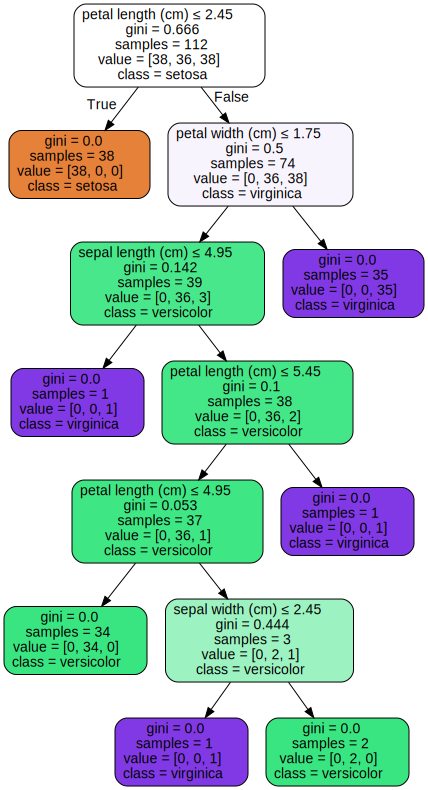

In [15]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph